In [1]:
#! pip install torchaudio==2.6.0
#! pip install tqdm
#! pip install soundfile
#! pip install matplotlib

In [ ]:
%load_ext autoreload
%autoreload 2
import sys
import os

# Adiciona a pasta raiz do projeto ao PYTHONPATH
sys.path.append(os.path.abspath('..'))

In [3]:
from src.preprocessing import *

In [4]:
! ls '../data/raw/LA/ASVspoof2019_LA_dev/flac/' | head -5

LA_D_1000265.flac
LA_D_1000752.flac
LA_D_1001095.flac
LA_D_1002130.flac
LA_D_1002200.flac
ls: write error: Broken pipe


In [5]:
! ls '../data/raw/LA/ASVspoof2019_LA_dev/flac/LA_D_1000265.flac'

../data/raw/LA/ASVspoof2019_LA_dev/flac/LA_D_1000265.flac


In [6]:
filepath = '../data/raw/LA/ASVspoof2019_LA_dev/flac/LA_D_1000265.flac'
waveform = load_audio(filepath)
mfcc_features = extract_mfcc(waveform)

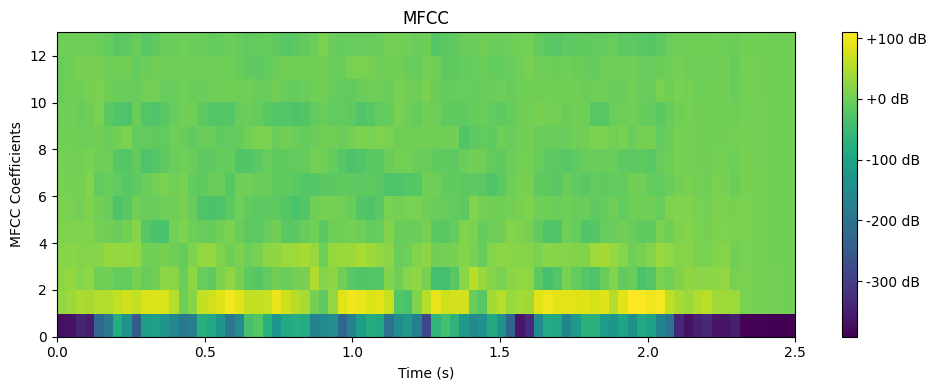

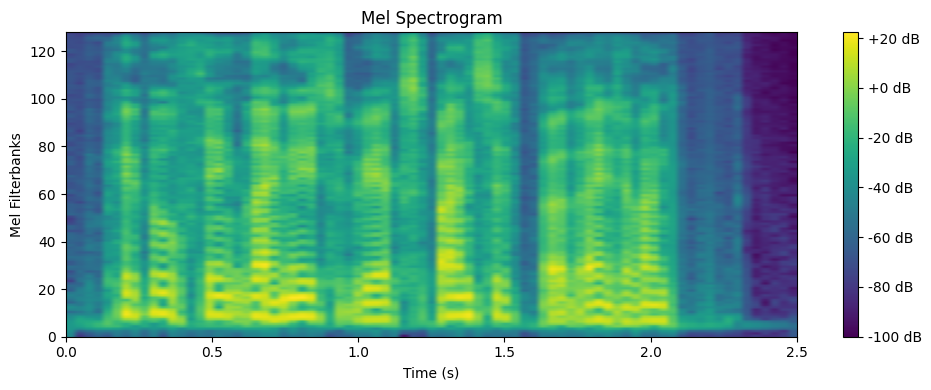

In [7]:
import matplotlib.pyplot as plt
import IPython.display as ipd
import numpy as np

sample_rate = 16000
n_fft = 1024
hop_length = 512

# Carregar áudio
waveform = load_audio('../data/raw/LA/ASVspoof2019_LA_train/flac/LA_T_1000137.flac')

# Tocar áudio
ipd.display(ipd.Audio(waveform.numpy(), rate=sample_rate))

# MFCC
feature_mfcc = extract_mfcc(waveform, sample_rate=sample_rate, n_fft=n_fft, hop_length=hop_length)
num_frames_mfcc = feature_mfcc.shape[-1]
duration = waveform.shape[-1] / sample_rate
time_axis_mfcc = np.linspace(0, duration, num_frames_mfcc)

plt.figure(figsize=(10, 4))
plt.imshow(feature_mfcc.squeeze().numpy(), cmap='viridis', origin='lower', aspect='auto', 
           extent=[time_axis_mfcc.min(), time_axis_mfcc.max(), 0, feature_mfcc.shape[1]])
plt.colorbar(format='%+2.0f dB')
plt.title('MFCC')
plt.xlabel('Time (s)')
plt.ylabel('MFCC Coefficients')
plt.tight_layout()
plt.show()

# Mel Spectrogram
feature_mel = extract_melspectrogram(waveform, sample_rate=sample_rate, n_fft=n_fft, hop_length=hop_length)
num_frames_mel = feature_mel.shape[-1]
time_axis_mel = np.linspace(0, duration, num_frames_mel)

plt.figure(figsize=(10, 4))
plt.imshow(feature_mel.squeeze().numpy(), cmap='viridis', origin='lower', aspect='auto',
           extent=[time_axis_mel.min(), time_axis_mel.max(), 0, feature_mel.shape[1]])
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Spectrogram')
plt.xlabel('Time (s)')
plt.ylabel('Mel Filterbanks')
plt.tight_layout()
plt.show()


In [12]:
folder_path = '../data/raw/LA/ASVspoof2019_LA_train/flac/'

In [ ]:
save_melspectrograms_from_folder(folder_path, save_path='../data/processed/melspectrograms.pkl', N=-1)

Extracting Mel Spectrograms: 100%|██████████| 25380/25380 [13:23<00:00, 31.58it/s]


Saved 25380 Mel Spectrograms to ../data/processed/melspectrograms.pkl


In [8]:
! du -sh '../data/processed/melspectrograms.pkl'

1.4G	../data/processed/melspectrograms.pkl


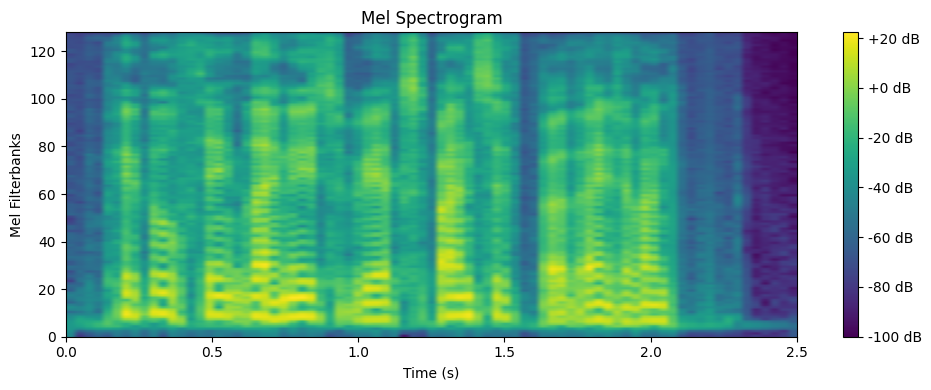

In [10]:
# Carregar o primeiro Mel Spectrogram salvo
save_path = '../data/processed/melspectrograms.pkl'

if os.path.exists(save_path):
    with open(save_path, 'rb') as f:
        spectrograms_list = pickle.load(f)


target_filename = 'LA_T_1000137.flac'
filtered_entry = next((entry for entry in spectrograms_list if entry['file'] == target_filename), None)
filtered_entry

# Mel Spectrogram
feature_mel = filtered_entry['spectrogram']
num_frames_mel = feature_mel.shape[-1]
time_axis_mel = np.linspace(0, duration, num_frames_mel)

plt.figure(figsize=(10, 4))
plt.imshow(feature_mel.squeeze(), cmap='viridis', origin='lower', aspect='auto',
           extent=[time_axis_mel.min(), time_axis_mel.max(), 0, feature_mel.shape[1]])
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Spectrogram')
plt.xlabel('Time (s)')
plt.ylabel('Mel Filterbanks')
plt.tight_layout()
plt.show()


In [ ]:
save_filterbank_features_from_folder(folder_path, save_path='../data/processed/filterbanks_features.pkl', N=-1)

Extracting Filterbank Features: 100%|██████████| 25380/25380 [13:54<00:00, 30.40it/s]


Saved 25380 filterbank features to ../data/processed/filterbanks_features.pkl


: 